In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  1


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# **Create a Sequential Model - Which is the Neural Network Architecture**


In [ ]:
model = Sequential([
      Dense(4, input_shape=(1,), activation='relu'),
      Dense(3, activation='relu'),
      Dense(2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# **Another way to create a Sequential Model**

In [ ]:
model2 = Sequential()

model2.add(Dense(4, input_shape=(1,), activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 8         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# **Compile a Model so its ready for training**

In [ ]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
model.compile(
    Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


In [ ]:
model.optimizer.learning_rate = 0.01

In [ ]:
model.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>

# Create Our Own Random Dataset That We Can Train Our Neural Network On
* A vaccine is tested on 5250 individuals from age 10 to 90.
* The individuals are split into two equal groups. First group is under 50 years and the second group is over 50 years.
* 95% in group 1 had no side effects.
* 95% in group 2 had side effects.


In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
training_set = []
training_labels = []

for i in range(125):
    random_under50 = randint(10,50)
    training_set.append(random_under50)
    training_labels.append(1)
    
    random_over50 = randint(51,90)
    training_set.append(random_over50)
    training_labels.append(0)
    
for i in range(2500):
    random_under50 = randint(10,50)
    training_set.append(random_under50)
    training_labels.append(0)
    
    random_over50 = randint(51,90)
    training_set.append(random_over50)
    training_labels.append(1)

In [ ]:
training_labels = np.array(training_labels)
training_set = np.array(training_set)
training_labels, training_set = shuffle(training_labels, training_set)

In [ ]:
print(training_set)
print(training_labels)

[38 34 16 ... 82 72 80]
[0 0 0 ... 1 1 1]


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set.reshape(-1,1))

In [ ]:
scaled_training_set

array([[0.35 ],
       [0.3  ],
       [0.075],
       ...,
       [0.9  ],
       [0.775],
       [0.875]])

## Create the Neural Network

In [ ]:
model = Sequential([
      Dense(units=1, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu'),
      Dense(units=12, activation='relu'),
      Dense(units=2, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_training_set, y=training_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
473/473 - 3s - loss: 0.6517 - accuracy: 0.6116 - val_loss: 0.6302 - val_accuracy: 0.6971
Epoch 2/30
473/473 - 1s - loss: 0.5998 - accuracy: 0.7238 - val_loss: 0.5746 - val_accuracy: 0.7619
Epoch 3/30
473/473 - 1s - loss: 0.5392 - accuracy: 0.8061 - val_loss: 0.5100 - val_accuracy: 0.8248
Epoch 4/30
473/473 - 1s - loss: 0.4742 - accuracy: 0.8612 - val_loss: 0.4441 - val_accuracy: 0.8705
Epoch 5/30
473/473 - 1s - loss: 0.4140 - accuracy: 0.9037 - val_loss: 0.3872 - val_accuracy: 0.8857
Epoch 6/30
473/473 - 1s - loss: 0.3655 - accuracy: 0.9204 - val_loss: 0.3423 - val_accuracy: 0.9371
Epoch 7/30
473/473 - 1s - loss: 0.3304 - accuracy: 0.9393 - val_loss: 0.3120 - val_accuracy: 0.9371
Epoch 8/30
473/473 - 1s - loss: 0.3070 - accuracy: 0.9429 - val_loss: 0.2912 - val_accuracy: 0.9371
Epoch 9/30
473/473 - 1s - loss: 0.2916 - accuracy: 0.9475 - val_loss: 0.2761 - val_accuracy: 0.9581
Epoch 10/30
473/473 - 1s - loss: 0.2807 - accuracy: 0.9484 - val_loss: 0.2658 - val_accuracy: 0.9581

## Create Some Test Data That The Neural Network Has Not Seen Before


In [ ]:
test_labels = []
test_set = []

for i in range(25):
    random_under50 = randint(10,50)
    test_set.append(random_under50)
    test_labels.append(1)
    
    random_over50 = randint(51,90)
    test_set.append(random_over50)
    test_labels.append(0)
    
for i in range(500):
    random_under50 = randint(10,50)
    test_set.append(random_under50)
    test_labels.append(0)
    
    random_over50 = randint(51,90)
    test_set.append(random_over50)
    test_labels.append(1)

In [ ]:
test_labels = np.array(test_labels)
test_set = np.array(test_set)
test_labels, test_set = shuffle(test_labels, test_set)
scaled_test_set = scaler.fit_transform(test_set.reshape(-1,1))

In [ ]:
scaled_test_set

array([[1.    ],
       [0.8375],
       [0.025 ],
       ...,
       [0.8375],
       [0.5   ],
       [0.85  ]])

Make Prediction With The Trained Neural Network

In [ ]:
predictions = model.predict(x=scaled_test_set, batch_size=10, verbose=0)

In [ ]:
predictions

array([[0.0058102 , 0.99418986],
       [0.02386111, 0.97613895],
       [0.9588726 , 0.04112742],
       ...,
       [0.02386111, 0.97613895],
       [0.55675656, 0.44324344],
       [0.0214273 , 0.9785727 ]], dtype=float32)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
rounded_predictions

array([1, 1, 0, ..., 1, 0, 1])

## Visualize The Prediction Results From The Neural Network On Test Data

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  print(cm)

  thresh = cm.max() / 2.0

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

Confusion Matrix without Normalization
[[500  25]
 [ 25 500]]


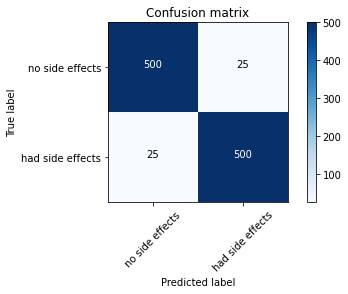

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

cm_plot_labels = ['no side effects', 'had side effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

## How To Save A Neural Networks Architecture and Weights When It's Done Training

In [ ]:
import os.path
if os.path.isfile('vaccine_trial_model.h5') is False:
  model.save('vaccine_trial_model.h5')
  print("Model Saved!")

Model Saved!


In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('vaccine_trial_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[ 0.69411564, -0.6549868 ,  0.63051486, -0.07436043,  0.5665383 ,
          0.7142416 ,  0.5258094 ,  0.37689108,  0.23895432,  0.59681994,
          0.47571743, -0.08612746]], dtype=float32),
 array([-0.08037931,  0.        , -0.18465157,  0.        ,  0.11678081,
        -0.13766776, -0.15838188, -0.06172133, -0.10337194, -0.13631767,
         0.11146188,  0.        ], dtype=float32),
 array([[ 0.0121936 , -0.13755673, -0.28762075,  0.09505132,  0.07509219,
          0.39723533,  0.03918025, -0.19513744, -0.31675303,  0.10196389,
          0.28403908,  0.25773588,  0.23126648, -0.4009253 ,  0.17990693,
          0.27755505,  0.35389325, -0.34341684,  0.27151754,  0.22339678,
         -0.21643282, -0.00329591,  0.04946434, -0.2515399 ],
        [-0.30360833,  0.1437586 , -0.18010601,  0.09369498, -0.27418545,
          0.22658318, -0.12899292, -0.19790198, -0.11536667,  0.21578836,
          0.07834548, -0.11126208, -0.29387504, -0.21175416,  0.1786344 ,
         -0.0354937 , 

## Save The Neural Network To A JSON File

In [ ]:
json_string = model.to_json()

In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 12, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 24, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


## Only Save The Weights Of The Neural Network

In [ ]:
import os.path
if os.path.isfile('model_weights.h5') is False:
  model.save_weights('model_weights.h5')
  print("Model Saved!")

Model Saved!


In [ ]:
model2 = Sequential([
      Dense(units=12, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu'),
      Dense(units=12, activation='relu'),
      Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights('model_weights.h5')

In [ ]:
model2.get_weights()

[array([[ 0.69411564, -0.6549868 ,  0.63051486, -0.07436043,  0.5665383 ,
          0.7142416 ,  0.5258094 ,  0.37689108,  0.23895432,  0.59681994,
          0.47571743, -0.08612746]], dtype=float32),
 array([-0.08037931,  0.        , -0.18465157,  0.        ,  0.11678081,
        -0.13766776, -0.15838188, -0.06172133, -0.10337194, -0.13631767,
         0.11146188,  0.        ], dtype=float32),
 array([[ 0.0121936 , -0.13755673, -0.28762075,  0.09505132,  0.07509219,
          0.39723533,  0.03918025, -0.19513744, -0.31675303,  0.10196389,
          0.28403908,  0.25773588,  0.23126648, -0.4009253 ,  0.17990693,
          0.27755505,  0.35389325, -0.34341684,  0.27151754,  0.22339678,
         -0.21643282, -0.00329591,  0.04946434, -0.2515399 ],
        [-0.30360833,  0.1437586 , -0.18010601,  0.09369498, -0.27418545,
          0.22658318, -0.12899292, -0.19790198, -0.11536667,  0.21578836,
          0.07834548, -0.11126208, -0.29387504, -0.21175416,  0.1786344 ,
         -0.0354937 , 

# Regularization - Reduce Overfitting

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model = Sequential([
      Dense(units=12, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(units=12, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(units=2, activation='softmax')
])